In [1]:
import pandas as pd
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_json("./data/ny_train.json")

In [3]:
df.loc[df["interest_level"] == "low", "interest_level"] = 0
df.loc[df["interest_level"] == "medium", "interest_level"] = 1
df.loc[df["interest_level"] == "high", "interest_level"] = 2

In [4]:
df['created'] = pd.to_datetime(df['created'])

df['year'] = df['created'].dt.year

df['month'] = df['created'].dt.month

df['day'] = df['created'].dt.day

df['week'] = df['created'].dt.week

df['hour'] = df['created'].dt.hour

df['weekday'] = df['created'].dt.weekday

In [5]:
df['num_photos'] = df['photos'].apply(len)

df['num_features'] = df['features'].apply(len)

In [6]:
df['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
6395831da5ed84e5dd1e4783ff1c373d       1
184d9021f6dccbaabd6d04858ca8ba3b       1
7b1bcff0420c79e9a8e14e020936f307       1
41fd7ce6fe2ae073870dd18c712e2aec       1
8497f99f71b9a901f91163a49251b007       1
Name: building_id, Length: 7585, dtype: int64

In [7]:
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,street_address,interest_level,year,month,day,week,hour,weekday,num_photos,num_features
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,145 Borinquen Place,1,2016,6,16,24,5,3,12,7
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,230 East 44th,0,2016,6,1,22,5,2,6,6
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,405 East 56th Street,1,2016,6,14,24,15,1,6,6
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,792 Metropolitan Avenue,1,2016,6,24,25,7,4,5,0
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,340 East 34th Street,0,2016,6,28,26,3,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,...,620 W 171 Street,0,2016,4,5,14,3,1,5,3
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,...,3333 Broadway,1,2016,4,2,13,2,5,5,7
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,...,210 Brighton 15th St,1,2016,4,26,17,5,1,3,11
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,...,350 West 21st Street,1,2016,4,19,16,2,1,5,5


In [8]:
df['building_id'].value_counts()

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
6395831da5ed84e5dd1e4783ff1c373d       1
184d9021f6dccbaabd6d04858ca8ba3b       1
7b1bcff0420c79e9a8e14e020936f307       1
41fd7ce6fe2ae073870dd18c712e2aec       1
8497f99f71b9a901f91163a49251b007       1
Name: building_id, Length: 7585, dtype: int64

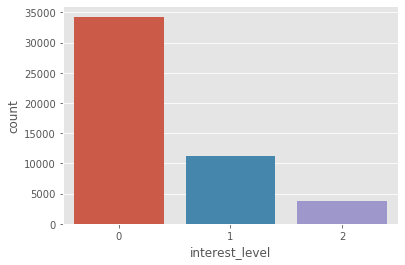

In [9]:
sns.countplot(x="interest_level", data=df)

In [10]:
df.groupby('interest_level').mean()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,year,month,day,week,hour,weekday,num_photos,num_features
interest_level,,,,,,,,,,,,,,
0,1.238741,1.514759,40.739504,7.026373e+06,-73.951667,4176.599142,2016.0,5.018697,15.384465,19.623498,4.331029,2.930930,5.524647,5.307957
1,1.163906,1.622050,40.745567,7.019098e+06,-73.965033,3158.767388,2016.0,5.003117,14.959480,19.499866,5.514382,2.893401,5.813251,5.888681
2,1.116176,1.546496,40.748007,7.017844e+06,-73.964613,2700.293045,2016.0,5.014848,14.344621,19.458453,6.444647,2.927585,5.738474,5.158635


In [11]:
pd.crosstab(df['bathrooms'], df['interest_level'], normalize='index')

interest_level,0,1,2
bathrooms,,,
0.0,0.977636,0.019169,0.003195
1.0,0.674268,0.239156,0.086576
1.5,0.937984,0.062016,0.000000
2.0,0.726632,0.220235,0.053133
2.5,0.989170,0.010830,0.000000
3.0,0.900671,0.080537,0.018792
3.5,1.000000,0.000000,0.000000
4.0,0.943396,0.031447,0.025157
4.5,1.000000,0.000000,0.000000


In [12]:
qq = pd.crosstab(df['manager_id'], df['interest_level'])
qq['sum'] = qq[0] + qq[1]+qq[2]
qq.sort_values(by=['sum'], ascending=False)

interest_level,0,1,2,sum
manager_id,,,,
e6472c7237327dd3903b3d6f6a94515a,1739,622,172,2533
6e5c10246156ae5bdcd9b487ca99d96a,644,63,4,711
8f5a9c893f6d602f4953fcc0b8e6e9b4,405,4,1,410
62b685cc0d876c3a1a51d63a0d6a8082,402,0,0,402
cb87dadbca78fad02b388dc9e8f25a5b,135,183,55,373
...,...,...,...,...
918acb34f159aeefe0b829a53ed6179c,1,0,0,1
916668a9ae4b9a3eeb2356c0c15d0384,1,0,0,1
9109b784e9f37346d6ac176e02e340da,1,0,0,1


In [13]:
pd.crosstab(df['num_features'], df['interest_level'], normalize='index')

interest_level,0,1,2
num_features,,,
0,0.651958,0.227470,0.120572
1,0.712903,0.202535,0.084562
2,0.698663,0.210207,0.091130
3,0.736435,0.189019,0.074545
4,0.730170,0.198571,0.071258
5,0.726413,0.206950,0.066637
6,0.691525,0.234159,0.074316
7,0.691464,0.247481,0.061055
8,0.668310,0.264789,0.066901


## 방당 가격 추가
## 별로 의미는 없는 듯함
## 로그를 취할 경우 price를 포함한 3개의 히스토그램이 같은 모양

In [14]:
df['each_price'] = df['price'] / (df['bedrooms'] + df['bathrooms'] + 1)
df['each_price']

4          800.000000
6          950.000000
9          873.750000
10         545.454545
15        1397.500000
             ...     
124000     560.000000
124002     598.750000
124004     616.666667
124008    1048.750000
124009     856.000000
Name: each_price, Length: 49352, dtype: float64

## 화장실 개수 + 침실 개수

In [15]:
df['room_num'] = np.log(df['bedrooms'] + df['bathrooms'] + 1)
df['room_num']

4         1.098612
6         1.386294
9         1.386294
10        1.704748
15        0.693147
            ...   
124000    1.609438
124002    1.386294
124004    1.098612
124008    1.386294
124009    1.609438
Name: room_num, Length: 49352, dtype: float64

(array([1.5700e+02, 0.0000e+00, 9.3520e+03, 9.0000e+00, 1.5543e+04,
        1.1310e+04, 1.0642e+04, 2.0280e+03, 2.9900e+02, 1.2000e+01]),
 array([0.        , 0.26741486, 0.53482973, 0.80224459, 1.06965946,
        1.33707432, 1.60448919, 1.87190405, 2.13931892, 2.40673378,
        2.67414865]),
 <a list of 10 Patch objects>)

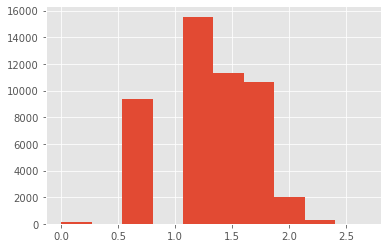

In [19]:
plt.hist(df['room_num'])

## X와 Y 나누기

In [20]:
y = df['interest_level']
df = df.drop(['interest_level'], axis=1)
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,year,month,day,week,hour,weekday,num_photos,num_features,each_price,room_num
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,2016,6,16,24,5,3,12,7,800.000000,1.098612
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,2016,6,1,22,5,2,6,6,950.000000,1.386294
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,2016,6,14,24,15,1,6,6,873.750000,1.386294
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,2016,6,24,25,7,4,5,0,545.454545,1.704748
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,2016,6,28,26,3,1,4,4,1397.500000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,...,2016,4,5,14,3,1,5,3,560.000000,1.609438
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,...,2016,4,2,13,2,5,5,7,598.750000,1.386294
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,...,2016,4,26,17,5,1,3,11,616.666667,1.098612
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,...,2016,4,19,16,2,1,5,5,1048.750000,1.386294


## 테스트와 트레인 나누기

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state = 1234)
y_train=np.array (y_train, dtype="float32")
y_train

array([0., 0., 2., ..., 0., 0., 0.], dtype=float32)

## 주소 빈도수에 따른 처리

In [22]:
X_train['display_address']

100814             W 12 Street
1886               E 78 Street
4013      Ft Washington Avenue
111847                West st 
105665        West 53rd Street
                  ...         
81421              E 73 Street
42948          EAST 8TH STREET
60140         West 45th Street
85578               E 94th St.
69052              W 16 Street
Name: display_address, Length: 39481, dtype: object

In [23]:
keys = X_train['display_address'].value_counts()
keys

Broadway                338
Second Avenue           291
Wall Street             281
East 34th Street        276
West 37th Street        234
                       ... 
416 East 73rd Street      1
East 72nd St              1
119 West 69th Street      1
Walls Up                  1
228 WEST 71 STREET        1
Name: display_address, Length: 7691, dtype: int64

In [24]:
keys = X_train['display_address'].value_counts().sort_values(ascending=False)
keys[(keys >= keys.quantile(0.90))]

Broadway            338
Second Avenue       291
Wall Street         281
East 34th Street    276
West 37th Street    234
                   ... 
31st Avenue           9
E 39 Street           9
East 64th Street      9
38th Street           9
E 83rd St.            9
Name: display_address, Length: 835, dtype: int64

In [25]:
rate = 0.85
keys.quantile(rate)

6.0

In [26]:
keys = X_train['display_address'].value_counts()
keys

Broadway                338
Second Avenue           291
Wall Street             281
East 34th Street        276
West 37th Street        234
                       ... 
416 East 73rd Street      1
East 72nd St              1
119 West 69th Street      1
Walls Up                  1
228 WEST 71 STREET        1
Name: display_address, Length: 7691, dtype: int64

In [27]:
keys = X_train['display_address'].value_counts()
sz = len(np.where(np.array(keys, dtype="float32")>=keys.quantile(rate))[0]) + 2
X_train['kkk']= np.zeros(len(X_train), dtype="float32") +  sz
for idx, k in enumerate(keys.keys()):
    print(k)
    if keys.loc[k] <= keys.quantile(rate):
        break
    else:
        X_train.loc[ X_train['display_address'] == k , 'kkk'] =  idx+1

c:\library\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\library\python\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Broadway
Second Avenue
Wall Street
East 34th Street
West 37th Street
West Street
First Avenue
Gold Street
Washington Street
York Avenue
Water Street
John Street
East 39th Street
West 54th Street
Lexington Avenue
Fifth Avenue
Third Avenue
East 89th Street
Columbus Avenue
West 42nd Street
East 82nd Street
East 35th Street
East 46th Street
Christopher Street
W 37 St.
West 34th Street
Thompson Street
West 45th Street
West End Avenue
East 79th Street
East 29th Street
East 92nd Street
Maiden Lane
East 88th Street
East 12th Street
Mott Street
East 78th Street

West 43rd Street
W 42 St.
W 43 St.
East 38th Street
East 10th Street
East 63rd Street
East 84th Street
East 72nd Street
East 83rd Street
2nd Ave.
East 56th Street
East 86th Street
Mulberry Street
West 57th Street
West 109th Street
Amsterdam Avenue
West 107th Street
Sullivan Street
West 47th Street
East 13th Street
W 54 St.
Center Boulevard
East 81st Street
W 34 St.
East 44th Street
Spruce Street
Ninth Avenue
East 75th Street
East 95th S

W 48 Street
E 33 Street
West 46th Street
Broadway Terrace
E 61st St.
Desbrosses Street
Harrison Street
West 171st Street
W 77 Street
9 Ave.
8th Ave.
East 48th Street
W 13th St.
Metropolitan Ave.
West 12th Street
W 73 Street
E 95 Street
Eleventh Avenue
E 38th St,
Atlantic Avenue
W 17 Street
83rd Avenue
W 38th St.
W 14th St
W 34 Street
1 Astor Place
West 115th Street
Leonard Street
Waverly Pl
West 173rd Street
W 145
E 38th St.
Norfolk Street
E 56th St
8th Ave
W 67 St.
W 45th St.
W 10 Street
W 22nd St.
E 33 St.
Broome St.
Harrison St.
West 94th Street
315 W 77th St.
St Marks Pl
Rutgers Street
West 104th Street
W 39th St.
35th Avenue
E 77th St.
E 79 St.
Kent Avenue
Park Ave.
Spring Street
E 62 Street
W 56 St.
South End Ave.
E 57th St.
48th Avenue
West 91st Street
MIDTOWN WEST
Forest Pkwy
West 168th Street
West 137th Street
N Moore St
W 14 Street
E 63 Street
W 31st St.
Greenwich St.
Fulton Street
Water
E 93rd St.
E 71st St.
Bank St.
West 101st Street
Chrystie St
Ave B
Duffield Street
east v

In [28]:
X_train['kkk'] = np.log(X_train['kkk'])

c:\library\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([  629.,   557.,   836.,  1346.,  2373.,  3222.,  4512.,  5548.,
         5805., 14653.]),
 array([0.        , 0.70553124, 1.4110625 , 2.1165938 , 2.822125  ,
        3.5276563 , 4.2331877 , 4.938719  , 5.64425   , 6.3497815 ,
        7.0553126 ], dtype=float32),
 <a list of 10 Patch objects>)

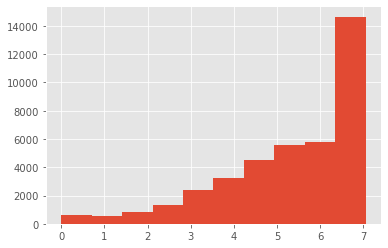

In [29]:
plt.hist(X_train['kkk'])

In [30]:
y_train = y_train.reshape(-1, 1)
y_train

enc = preprocessing.OneHotEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train).toarray()
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## price 로그 취하기

In [31]:
X_train.loc[:, ['price', 'each_price']] = np.log(X_train.loc[:, ['price', 'each_price']])

c:\library\python\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## 데이터 표준화

In [33]:
features_to_use = ['bathrooms',	'bedrooms', 'latitude', 'longitude',
                   'price','day', 'week', 'hour', 'weekday', 'num_photos', 'num_features', 'kkk', 'each_price']
features_to_use

X_train = X_train[features_to_use]
X_train = np.array(X_train[features_to_use], dtype="float32")
X_train

array([[ 2.       ,  2.       , 40.7373   , ...,  6.       ,  6.8068295,
         7.002156 ],
       [ 1.       ,  2.       , 40.77     , ...,  2.       ,  4.934474 ,
         6.523929 ],
       [ 1.       ,  1.       , 40.8573   , ...,  5.       ,  7.0553126,
         6.4769726],
       ...,
       [ 1.       ,  0.       , 40.7601   , ...,  3.       ,  3.3322046,
         6.9077554],
       [ 1.       ,  2.       , 40.7826   , ...,  9.       ,  6.9508147,
         6.6184053],
       [ 1.       ,  1.       , 40.7391   , ...,  2.       ,  6.150603 ,
         6.838405 ]], dtype=float32)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X_train = scaler.transform(X_train)

## 필요한 데이터만 가져오기

## 오버샘플링

In [36]:
# # BorderlineSMOTE
# from imblearn.over_sampling import BorderlineSMOTE

# X_train, y_train = BorderlineSMOTE().fit_resample(X_train, y_train)
# # print(sorted(Counter(y_resampled).items()))

# importing ADASYN
from imblearn.over_sampling import ADASYN

# applying ADASYN
X_train, y_train = ADASYN().fit_resample(X_train, y_train)

# from imblearn.over_sampling import SMOTENC

# # applying SMOTE to our data and checking the class counts
# X_train, y_train = SMOTENC(categorical_features=[0, 1, 2], random_state=1234).fit_resample(X_train, y_train)

Using TensorFlow backend.
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\library\python\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing

## 딥러닝 학습

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [38]:
model = Sequential()

model.add(Dense(200, input_dim=X_train.shape[1] , activation="relu"))

model.add(Dense(100,  activation="relu"))

model.add(Dense(3,  activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2800      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 23,203
Trainable params: 23,203
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['acc'])
model.fit(X_train, y_train, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
81503/81503 [==============================] - 4s 53us/step - loss: 0.8862 - acc: 0.5623
Epoch 2/100
81503/81503 [==============================] - 4s 45us/step - loss: 0.8414 - acc: 0.5977
Epoch 3/100
81503/81503 [==============================] - 4s 45us/step - loss: 0.8094 - acc: 0.6180
Epoch 4/100
81503/81503 [==============================] - 4s 44us/step - loss: 0.7771 - acc: 0.6375
Epoch 5/100
81503/81503 [==============================] - 4s 46us/step - loss: 0.7485 - acc: 0.6566
Epoch 6/100
81503/81503 [==============================] - 4s 45us/step - loss: 0.7210 - acc: 0.6747
Epoch 7/100
81503/81503 [==============================] - 4s 45us/step - loss: 0.6947 - acc: 0.6896
Epoch 8/100
81503/81503 [==============================] - 4s 45us/step - loss: 0.6718 - acc: 0.7021
Epoch 9/100
81503/81503 [==============================] - 4s 45us/step - loss: 0.6509 - acc: 0.7143
Epoch 10/100
81503/81503 [=================

81503/81503 [==============================] - 4s 45us/step - loss: 0.3385 - acc: 0.8577
Epoch 79/100
81503/81503 [==============================] - 4s 46us/step - loss: 0.3351 - acc: 0.8584
Epoch 80/100
81503/81503 [==============================] - 4s 46us/step - loss: 0.3395 - acc: 0.8569
Epoch 81/100
81503/81503 [==============================] - 4s 54us/step - loss: 0.3352 - acc: 0.8586
Epoch 82/100
81503/81503 [==============================] - 4s 43us/step - loss: 0.3335 - acc: 0.8594
Epoch 83/100
81503/81503 [==============================] - 3s 43us/step - loss: 0.3361 - acc: 0.8590
Epoch 84/100
81503/81503 [==============================] - 3s 42us/step - loss: 0.3302 - acc: 0.8611
Epoch 85/100
81503/81503 [==============================] - 4s 43us/step - loss: 0.3306 - acc: 0.8606
Epoch 86/100
81503/81503 [==============================] - 4s 44us/step - loss: 0.3314 - acc: 0.8611
Epoch 87/100
81503/81503 [==============================] - 4s 46us/step - loss: 0.3291 - acc: 

## 테스트셋 확인

In [41]:
X_test['kkk']= np.zeros(len(X_test), dtype="float32") +  sz
for idx, k in enumerate(keys.keys()):
    print(k)
    if keys.loc[k] <= keys.quantile(rate):
        break
    else:
        X_test.loc[ X_test['display_address'] == k , 'kkk'] =  idx+1

Broadway
Second Avenue
Wall Street
East 34th Street
West 37th Street
West Street
First Avenue
Gold Street
Washington Street
York Avenue
Water Street
John Street
East 39th Street
West 54th Street

c:\library\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\library\python\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s



Lexington Avenue
Fifth Avenue
Third Avenue
East 89th Street
Columbus Avenue
West 42nd Street
East 82nd Street
East 35th Street
East 46th Street
Christopher Street
W 37 St.
West 34th Street
Thompson Street
West 45th Street
West End Avenue
East 79th Street
East 29th Street
East 92nd Street
Maiden Lane
East 88th Street
East 12th Street
Mott Street
East 78th Street

West 43rd Street
W 42 St.
W 43 St.
East 38th Street
East 10th Street
East 63rd Street
East 84th Street
East 72nd Street
East 83rd Street
2nd Ave.
East 56th Street
East 86th Street
Mulberry Street
West 57th Street
West 109th Street
Amsterdam Avenue
West 107th Street
Sullivan Street
West 47th Street
East 13th Street
W 54 St.
Center Boulevard
East 81st Street
W 34 St.
East 44th Street
Spruce Street
Ninth Avenue
East 75th Street
East 95th Street
West St.
East 14th Street
East 36th Street
West 14th Street
John St.
East 55th Street
East 33rd Street
East 25th Street
West 26th Street
West 13th Street
East 87th Street
West 52nd Street


Harrison Street
West 171st Street
W 77 Street
9 Ave.
8th Ave.
East 48th Street
W 13th St.
Metropolitan Ave.
West 12th Street
W 73 Street
E 95 Street
Eleventh Avenue
E 38th St,
Atlantic Avenue
W 17 Street
83rd Avenue
W 38th St.
W 14th St
W 34 Street
1 Astor Place
West 115th Street
Leonard Street
Waverly Pl
West 173rd Street
W 145
E 38th St.
Norfolk Street
E 56th St
8th Ave
W 67 St.
W 45th St.
W 10 Street
W 22nd St.
E 33 St.
Broome St.
Harrison St.
West 94th Street
315 W 77th St.
St Marks Pl
Rutgers Street
West 104th Street
W 39th St.
35th Avenue
E 77th St.
E 79 St.
Kent Avenue
Park Ave.
Spring Street
E 62 Street
W 56 St.
South End Ave.
E 57th St.
48th Avenue
West 91st Street
MIDTOWN WEST
Forest Pkwy
West 168th Street
West 137th Street
N Moore St
W 14 Street
E 63 Street
W 31st St.
Greenwich St.
Fulton Street
Water
E 93rd St.
E 71st St.
Bank St.
West 101st Street
Chrystie St
Ave B
Duffield Street
east village
E 68 Street
Rector St.
Ocean Avenue
Manhattan Ave
Liberty Street
E 35th St,
W 92

In [42]:
X_test['kkk'] = np.log(X_test['kkk'])

c:\library\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
y_test = np.array(y_test, dtype="float32")
y_test = y_test.reshape(-1, 1)
y_test_onehot = enc.transform(y_test).toarray()
y_test_onehot

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [44]:
X_test['price'] = np.log(X_test['price'])
X_test['each_price'] = np.log(X_test['each_price'])

c:\library\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\library\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
features_to_use = ['bathrooms',	'bedrooms', 'latitude', 'longitude',
                   'price','day', 'week', 'hour', 'weekday', 'num_photos', 'num_features', 'kkk', 'each_price']
features_to_use

X_test = X_test[features_to_use]
X_test = np.array(X_test[features_to_use], dtype="float32")
X_test

array([[ 1.       ,  2.       , 40.7928   , ..., 10.       ,  6.0088134,
         6.7001157],
       [ 2.5      ,  2.       , 40.7634   , ..., 10.       ,  5.3565865,
         7.5848656],
       [ 1.       ,  2.       , 40.8644   , ...,  7.       ,  7.0553126,
         6.263398 ],
       ...,
       [ 1.       ,  0.       , 40.7225   , ...,  4.       ,  7.0553126,
         6.9077554],
       [ 1.       ,  0.       , 40.7239   , ...,  7.       ,  6.7214255,
         7.109062 ],
       [ 1.       ,  3.       , 40.7255   , ...,  3.       ,  6.9206715,
         6.897705 ]], dtype=float32)

In [46]:
X_test = scaler.transform(X_test)

In [47]:
predict = model.predict(X_test)
predict01 = np.argmax(predict, 1)
target = np.argmax(y_test_onehot, 1)
predict02 = (predict01 == target)
acc = np.sum(predict02)/ len(predict02)
acc

0.6186809847026644

(array([5628.,    0.,    0.,    0.,    0., 3236.,    0.,    0.,    0.,
        1007.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

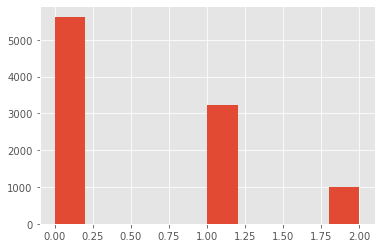

In [48]:
plt.hist(predict01)

(array([6841.,    0.,    0.,    0.,    0., 2255.,    0.,    0.,    0.,
         775.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

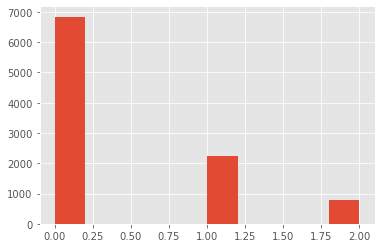

In [49]:
plt.hist(target)